In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./concrete.csv")
y = data["CompressiveStrength"]
X = data.drop(["CompressiveStrength"], axis=1)

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size= 0.7, test_size=0.3)

In [6]:
input_shape= [X_train.shape[1]]

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mae", metrics=["mae"])

history = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], verbose=0, batch_size=64, epochs=100)

<Axes: >

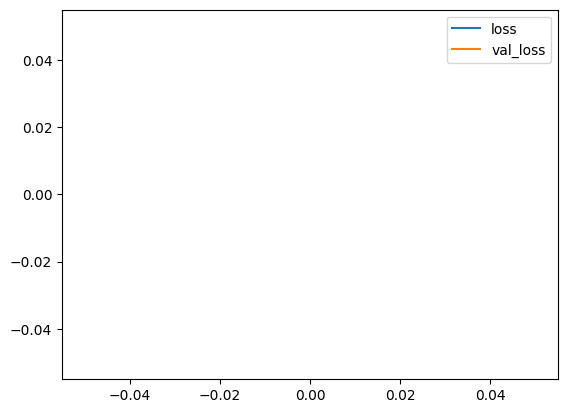

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()

In [17]:
model2 = keras.Sequential([
  
    
    
    layers.BatchNormalization(input_shape=input_shape),    
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model2.compile(optimizer="sgd", loss="mae", metrics=["mae"])
history2 = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], verbose=0, batch_size=64, epochs=100)

C:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Axes: >

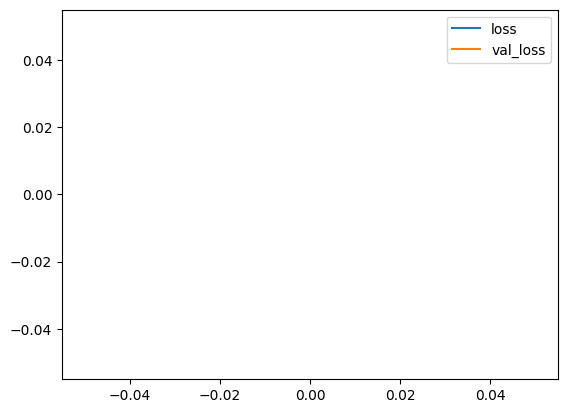

In [16]:
history2_df = pd.DataFrame(history2.history)
history2_df.loc[:, ["loss", "val_loss"]].plot()